<div style="background-color: #FFEE77; padding: 10px;">

# ***`Import The Libraries`***

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.formula.api as sfa
import statsmodels.api as sma
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.diagnostic import linear_rainbow

<div style="background-color: #FFEE77; padding: 10px;">

# ***`Import the dataset`***

In [2]:
data = pd.read_excel('Concrete_Data.xlsx')

In [3]:
data

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,CCS
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.284354
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.178794
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.696601
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.768036


## ***`Descriptive Analysis`***

In [4]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Cement,1030.0,281.165631,104.507142,102.000000,192.375000,272.900000,350.000000,540.000000
Blast Furnace Slag,1030.0,73.895485,86.279104,0.000000,0.000000,22.000000,142.950000,359.400000
Fly Ash,1030.0,54.187136,63.996469,0.000000,0.000000,0.000000,118.270000,200.100000
Water,1030.0,181.566359,21.355567,121.750000,164.900000,185.000000,192.000000,247.000000
Superplasticizer,1030.0,6.203112,5.973492,0.000000,0.000000,6.350000,10.160000,32.200000
Coarse Aggregate,1030.0,972.918592,77.753818,801.000000,932.000000,968.000000,1029.400000,1145.000000
Fine Aggregate,1030.0,773.578883,80.175427,594.000000,730.950000,779.510000,824.000000,992.600000
Age,1030.0,45.662136,63.169912,1.000000,7.000000,28.000000,56.000000,365.000000
CCS,1030.0,35.817836,16.705679,2.331808,23.707115,34.442774,46.136287,82.599225


<div style="background-color: #ccf2ff; padding: 10px;">

### **Inferences from the Concrete Dataset**

1. **Cement**  
   - Mean: ~281.2 kg/m³, Range: 102 to 540 kg/m³.  
   - Significant variation, indicating diverse concrete mixes.

2. **Blast Furnace Slag**  
   - Mean: ~73.9 kg/m³, Std: ~86.3.  
   - Many samples have no slag (25th percentile = 0).

3. **Fly Ash**  
   - Mean: ~54.2 kg/m³, Std: ~64.  
   - Half of the samples have no fly ash (Median = 0).

4. **Water**  
   - Mean: ~181.6 kg/m³, Std: ~21.4.  
   - Uniform water content across most samples.

5. **Superplasticizer**  
   - Mean: ~6.2 kg/m³, Std: ~6.  
   - High variation; many samples contain none (25th percentile = 0).

6. **Coarse Aggregate**  
   - Mean: ~972.9 kg/m³, Std: ~77.8.  
   - Stable component in concrete mixes.

7. **Fine Aggregate**  
   - Mean: ~773.6 kg/m³, Std: ~80.2.  
   - Complements coarse aggregate in stability.

8. **Age**  
   - Mean: ~45.7 days, Range: 1 to 365 days.  
   - Curing times vary significantly.

9. **Compressive Strength (CCS)**  
   - Mean: ~35.8 MPa, Range: 2.3 to 82.6 MPa.  
   - Indicates a wide range of concrete strengths in the dataset.

### ***`Correlation Plot`***

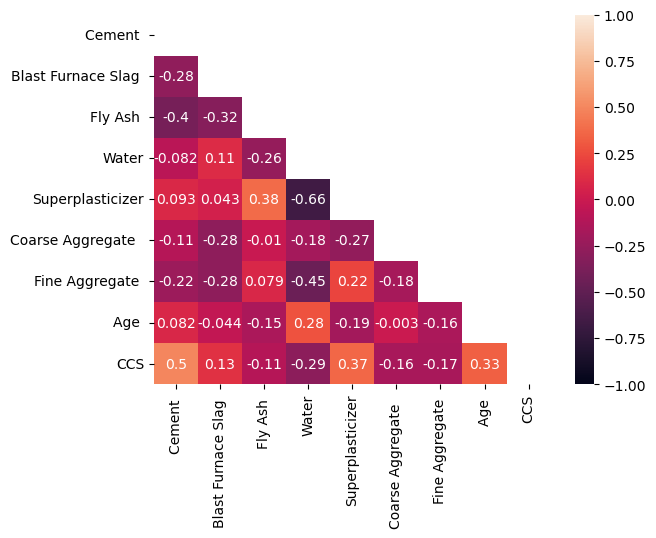

In [5]:
sns.heatmap(data.corr(),annot=True,vmax=1,vmin=-1,mask=np.triu(data.corr()))
plt.show()

<div style="background-color: #ccf2ff; padding: 10px;">

### **Inferences for High Positive or High Negative Correlations**

1. **Water and Superplasticizer**  
   - Strong negative correlation (-0.657).  
   - Higher use of superplasticizer significantly reduces the water requirement in the mix.

2. **Cement and CCS**  
   - Strong positive correlation (0.498).  
   - Higher cement content significantly increases compressive strength.

3. **Superplasticizer and CCS**  
   - Moderate positive correlation (0.366).  
   - Superplasticizer enhances compressive strength by improving workability and reducing water content.

## ***`Treat the Defects`***

In [6]:
# Missing Values
data.isnull().sum()

Cement                 0
Blast Furnace Slag     0
Fly Ash                0
Water                  0
Superplasticizer       0
Coarse Aggregate       0
Fine Aggregate         0
Age                    0
CCS                    0
dtype: int64

In [7]:
# Duplicate Rows
data[data.duplicated()]

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,CCS
77,425.0,106.3,0.0,153.5,16.5,852.1,887.1,3,33.398217
80,425.0,106.3,0.0,153.5,16.5,852.1,887.1,3,33.398217
86,362.6,189.0,0.0,164.9,11.6,944.7,755.8,3,35.301171
88,362.6,189.0,0.0,164.9,11.6,944.7,755.8,3,35.301171
91,362.6,189.0,0.0,164.9,11.6,944.7,755.8,3,35.301171
100,425.0,106.3,0.0,153.5,16.5,852.1,887.1,7,49.201007
103,425.0,106.3,0.0,153.5,16.5,852.1,887.1,7,49.201007
109,362.6,189.0,0.0,164.9,11.6,944.7,755.8,7,55.895819
111,362.6,189.0,0.0,164.9,11.6,944.7,755.8,7,55.895819
123,425.0,106.3,0.0,153.5,16.5,852.1,887.1,28,60.294676


In [8]:
# Dropping Duplicate Values
data.drop_duplicates(inplace=True)

In [9]:
data

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,CCS
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.284354
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.178794
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.696601
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.768036


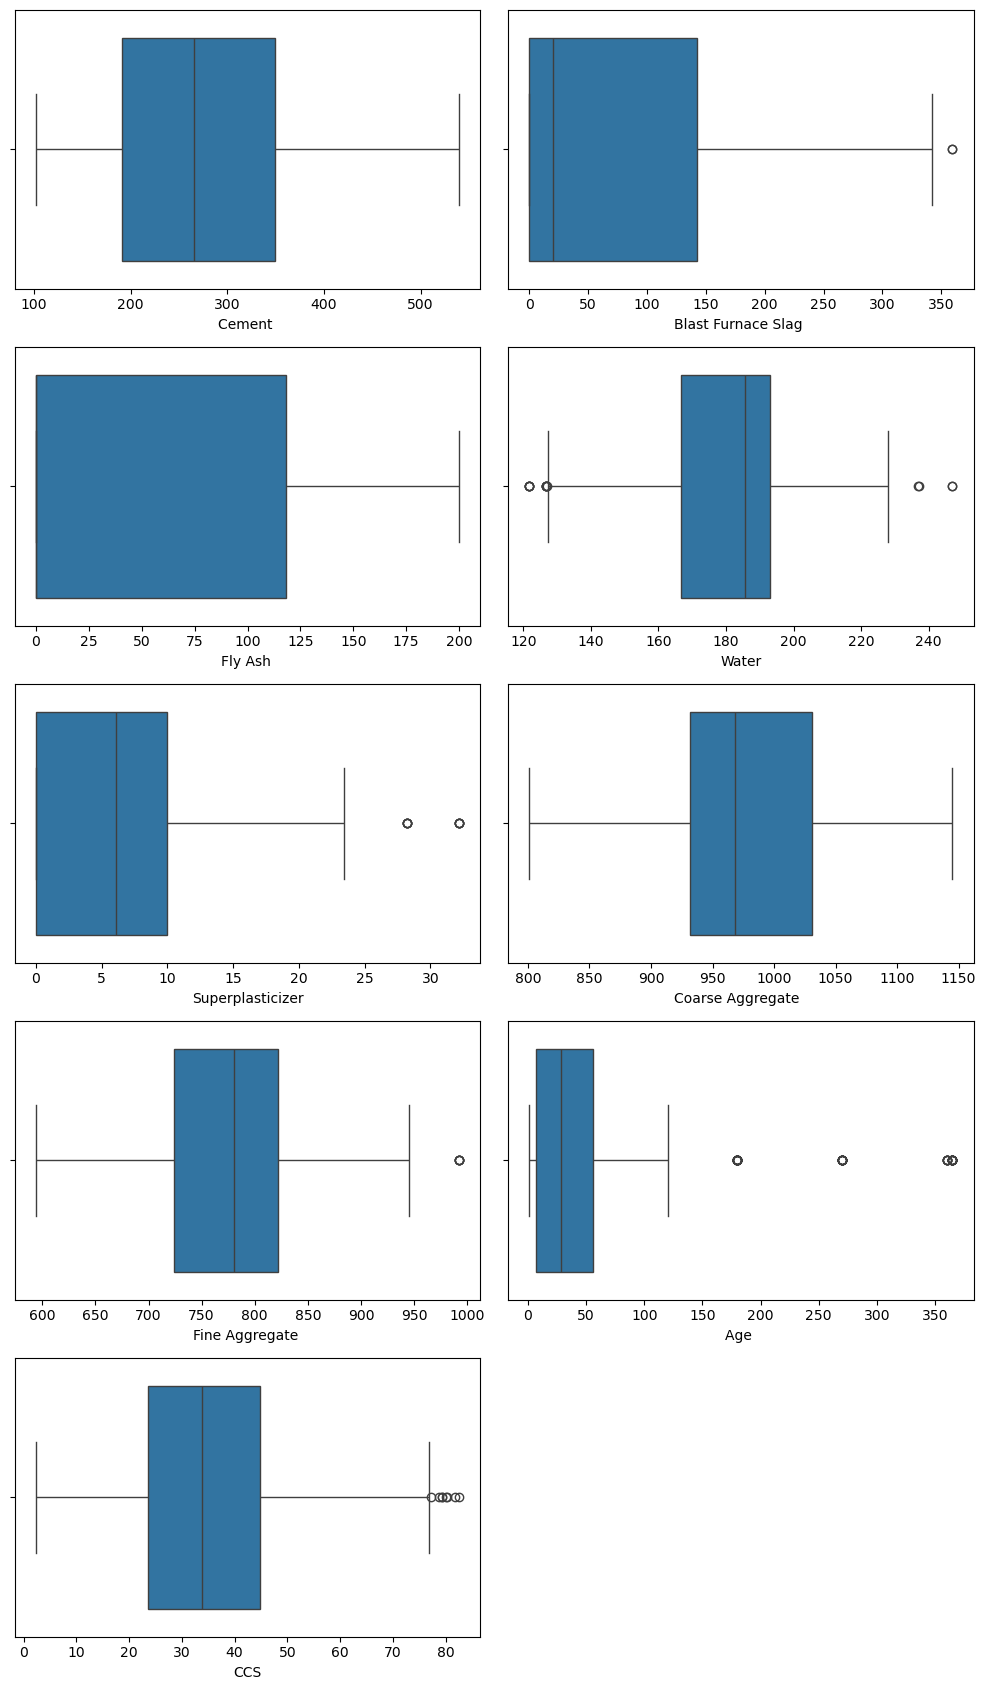

In [10]:
# Checking Outliers
t = 1
plt.figure(figsize=(10,17))
for i in data.columns:
    plt.subplot(5,2,t)
    sns.boxplot(x=data[i])
    t += 1
plt.tight_layout()
plt.show()

In [11]:
# Capping the Outliers
for i in data.columns:
    q1 = np.percentile(data[i],25)
    q3 = np.percentile(data[i],75)
    iqr = q3 - q1
    ll = q1 - 1.5*iqr
    ul = q3 + 1.5*iqr
    data[i] = data[i].apply(lambda x: ll if x < ll else ul if x > ul else x)

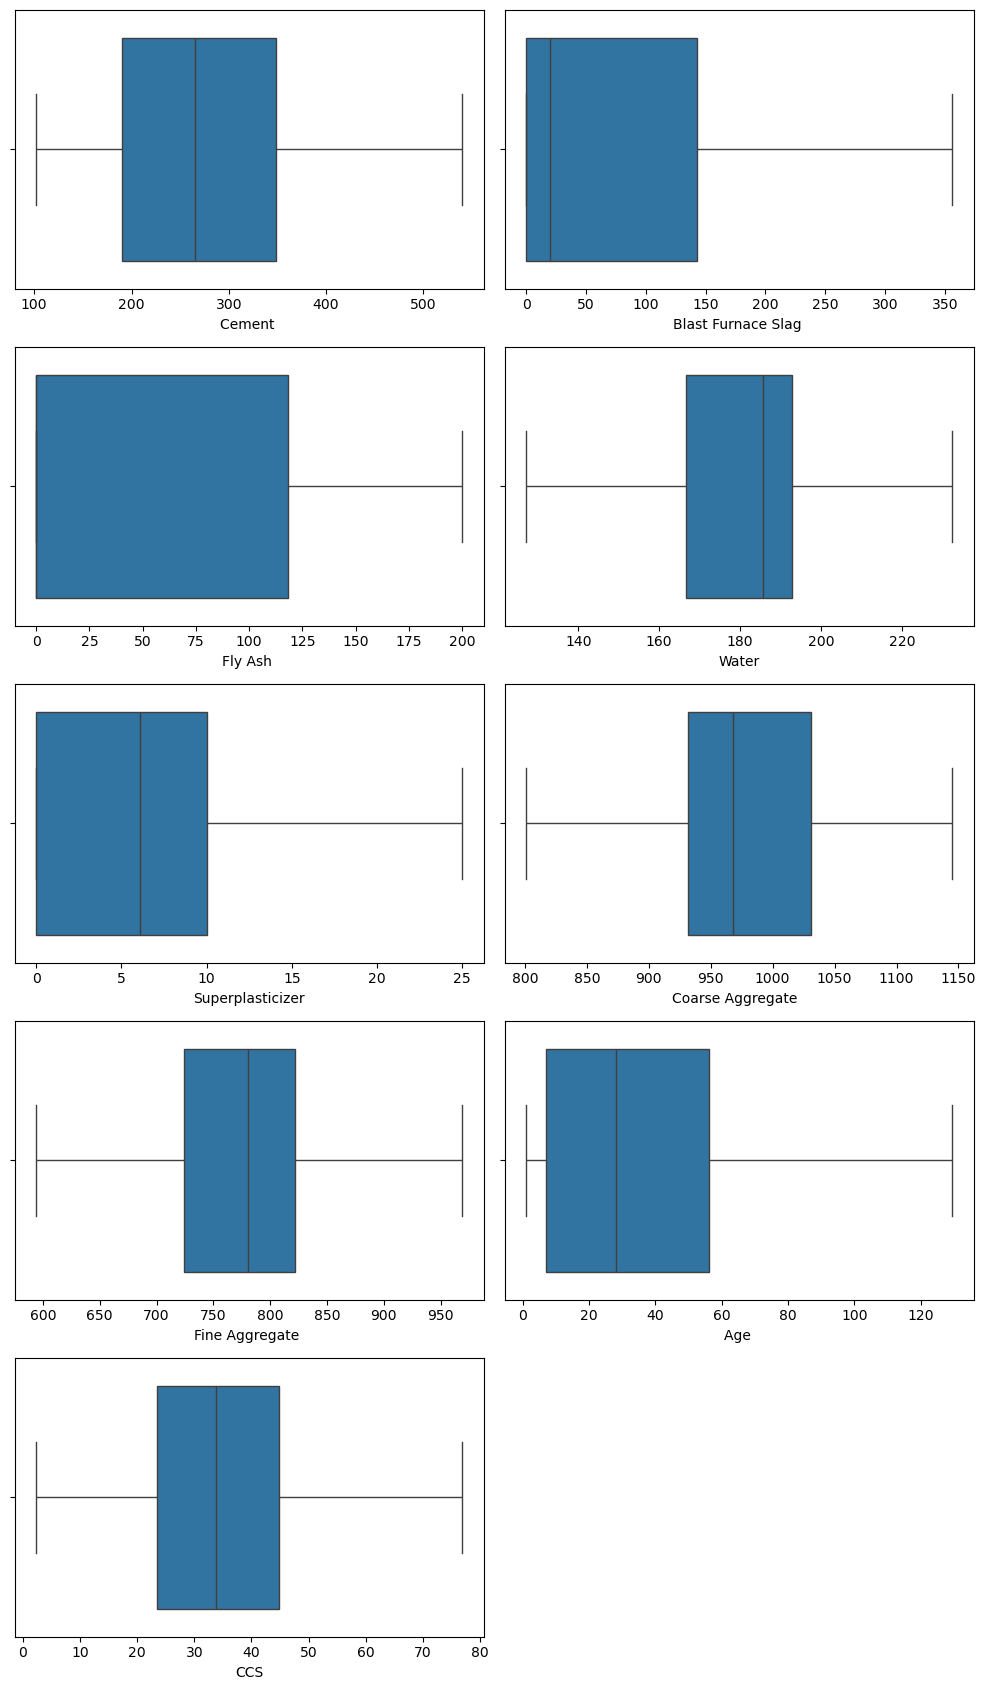

In [12]:
t = 1
plt.figure(figsize=(10,17))
for i in data.columns:
    plt.subplot(5,2,t)
    sns.boxplot(x=data[i])
    t += 1
plt.tight_layout()
plt.show()

## ***`Linear Regression Analysis`***

In [13]:
# Split
y = data['CCS']
x = data.drop(columns=['CCS'])

## Assumption 1

### Assumption 2: There should be no multicolinearity

In [14]:
# VIF
x.drop(columns=['Coarse Aggregate  '],inplace=True)
vif = []
for i in range(x.shape[1]):
    vif.append(variance_inflation_factor(x.values,i))

vif_data = pd.DataFrame({'VIF':vif},index=x.columns)
vif_data

,VIF
Cement,14.267535
Blast Furnace Slag,3.278204
Fly Ash,4.159872
Water,72.333537
Superplasticizer,5.464804
Fine Aggregate,47.949524
Age,2.248795


In [15]:
sma.OLS(y,sma.add_constant(x)).fit().rsquared

0.7214599162155249

In [16]:
data.columns

Index(['Cement ', 'Blast Furnace Slag ', 'Fly Ash ', 'Water',
       'Superplasticizer', 'Coarse Aggregate  ', 'Fine Aggregate ', 'Age ',
       'CCS'],
      dtype='object')

In [17]:
# VIF
x.drop(columns=['Fine Aggregate '],inplace=True)
vif = []
for i in range(x.shape[1]):
    vif.append(variance_inflation_factor(x.values,i))

vif_data = pd.DataFrame({'VIF':vif},index=x.columns)
vif_data

,VIF
Cement,13.954376
Blast Furnace Slag,2.991824
Fly Ash,4.068454
Water,21.626638
Superplasticizer,3.918141
Age,2.234706


In [18]:
sma.OLS(y,sma.add_constant(x)).fit().rsquared

0.7214079179608108

In [19]:
x['Cement Water Ratio'] = x['Cement ']/x['Water']
x.drop(columns=['Cement ','Water'],inplace=True)

In [20]:
vif = []
for i in range(x.shape[1]):
    vif.append(variance_inflation_factor(x.values,i))

vif_data = pd.DataFrame({'VIF':vif},index=x.columns)
vif_data

,VIF
Blast Furnace Slag,1.484503
Fly Ash,2.115637
Superplasticizer,3.478069
Age,1.970481
Cement Water Ratio,3.260167


In [21]:
sma.OLS(y,sma.add_constant(x)).fit().rsquared

0.7117175527539445

# ***`Fit a model`***

In [25]:
model = sma.OLS(y,sma.add_constant(x)).fit()

In [26]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    CCS   R-squared:                       0.712
Model:                            OLS   Adj. R-squared:                  0.710
Method:                 Least Squares   F-statistic:                     493.3
Date:                Wed, 09 Oct 2024   Prob (F-statistic):          7.66e-267
Time:                        13:14:42   Log-Likelihood:                -3600.7
No. Observations:                1005   AIC:                             7213.
Df Residuals:                     999   BIC:                             7243.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 -14.4833    

# Assumption 4

In [27]:
# Ho: Variables are lineqr
# Ha: Variables are not Linear

p_value = linear_rainbow(model)[1]

if p_value < 0.05:
    print("Reject Ho")
else:
    print("Failed to Reject Ho")

Reject Ho


# Assumption 5

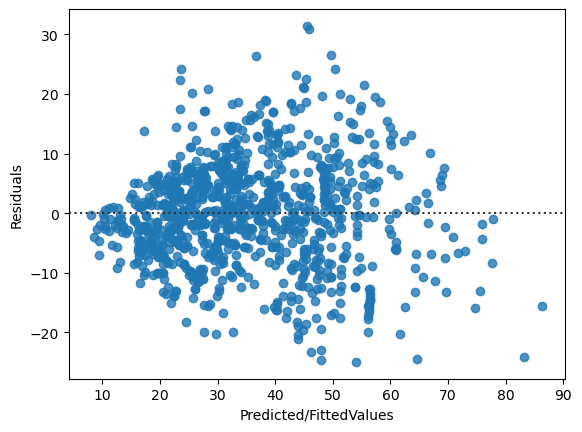

In [28]:
sns.residplot(x=model.fittedvalues,y=model.resid)
plt.xlabel('Predicted/FittedValues')
plt.ylabel('Residuals')
plt.show()

In [29]:
# Ho: The Variance is same(Homoscedastic)
# Ha: The Variance is not same(Heteroscedastic)

p_value = sma.stats.diagnostic.het_breuschpagan(resid=model.resid,exog_het=sma.add_constant(x).values)[1]

if p_value < 0.05:
    print("Reject Ho")
else:
    print("Failed to reject Ho")

Reject Ho


# Assumption 6

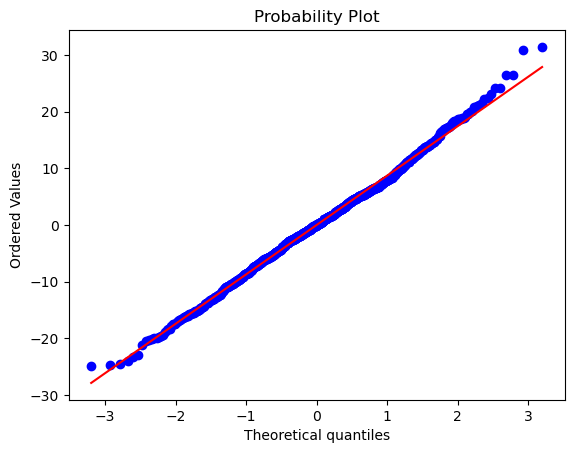

In [30]:
stats.probplot(model.resid,plot=plt)
plt.show()

In [31]:
# Ho: Data is normal
# Ha: Data is not normal

p_value = stats.shapiro(model.resid)[1]

if p_value < 0.05:
    print("Reject Ho")
else:
    print("Failed to reject Ho")

Failed to reject Ho


## ***`Predictive Modelling`***

In [32]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet
from sklearn.metrics import (r2_score,mean_squared_error,mean_absolute_error,mean_absolute_percentage_error)
from sklearn.model_selection import train_test_split

## ***`Train Test Split`***

In [33]:
x_train, x_test, y_train, y_test = train_test_split(x,y,train_size=800,random_state=2)

In [34]:
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(800, 5) (800,) (205, 5) (205,)


## ***`Linear Regression`***

In [35]:
model_lr = LinearRegression()
model_lr.fit(x_train,y_train)
y_lr_train = model_lr.predict(x_train)
y_lr_test = model_lr.predict(x_test)

In [36]:
# Train Metrics
print('R2: ',r2_score(y_train,y_lr_train))
print('MSE: ',mean_squared_error(y_train,y_lr_train))
print('RMSE: ',mean_squared_error(y_train,y_lr_train)**0.5)
print('MAE: ',mean_absolute_error(y_train,y_lr_train))
print('MAPE: ',mean_absolute_percentage_error(y_train,y_lr_train))

R2:  0.7143103932676484
MSE:  75.76260161073316
RMSE:  8.704171506279799
MAE:  6.809201716597718
MAPE:  0.25434182808170425


In [37]:
# Test Metrics
print('R2: ',r2_score(y_test,y_lr_test))
print('MSE: ',mean_squared_error(y_test,y_lr_test))
print('RMSE: ',mean_squared_error(y_test,y_lr_test)**0.5)
print('MAE: ',mean_absolute_error(y_test,y_lr_test))
print('MAPE: ',mean_absolute_percentage_error(y_test,y_lr_test))

R2:  0.6970935894657555
MSE:  76.81189095069169
RMSE:  8.764239325274708
MAE:  6.828110808684348
MAPE:  0.24600507146457531


In [38]:
model_lr.intercept_

-15.11141916982438

In [39]:
pd.DataFrame({'Coef':model_lr.coef_},index=x.columns)

,Coef
Blast Furnace Slag,0.080493
Fly Ash,0.078325
Superplasticizer,0.201586
Age,0.239704
Cement Water Ratio,19.145826


## ***`Regularization`***

### ***`Ridge Regularization (L2 Penalty)`***

In [40]:
model_ridge = Ridge(alpha=0.1)
model_ridge.fit(x_train,y_train)
y_ridge_train = model_ridge.predict(x_train)
y_ridge_test = model_ridge.predict(x_test)

In [41]:
# Train Metrics
print('R2: ',r2_score(y_train,y_ridge_train))
print('MSE: ',mean_squared_error(y_train,y_ridge_train))
print('RMSE: ',mean_squared_error(y_train,y_ridge_train)**0.5)
print('MAE: ',mean_absolute_error(y_train,y_ridge_train))
print('MAPE: ',mean_absolute_percentage_error(y_train,y_ridge_train))

R2:  0.7143102782002051
MSE:  75.76263212569995
RMSE:  8.704173259172864
MAE:  6.809272207884114
MAPE:  0.25437499479448866


In [42]:
# Test Metrics
print('R2: ',r2_score(y_test,y_ridge_test))
print('MSE: ',mean_squared_error(y_test,y_ridge_test))
print('RMSE: ',mean_squared_error(y_test,y_ridge_test)**0.5)
print('MAE: ',mean_absolute_error(y_test,y_ridge_test))
print('MAPE: ',mean_absolute_percentage_error(y_test,y_ridge_test))

R2:  0.6971321879918011
MSE:  76.80210302389199
RMSE:  8.763680906097163
MAE:  6.827652591396693
MAPE:  0.24602853047220485


In [43]:
pd.DataFrame({'Coef_lr':model_lr.coef_,'Coef_L2':model_ridge.coef_},index=x.columns)

,Coef_lr,Coef_L2
Blast Furnace Slag,0.080493,0.080444
Fly Ash,0.078325,0.078234
Superplasticizer,0.201586,0.202439
Age,0.239704,0.239698
Cement Water Ratio,19.145826,19.133058


### ***`Lasso Regularization (L1 Penalty)`***

In [44]:
model_lasso = Lasso(alpha=0.1)
model_lasso.fit(x_train,y_train)
y_lasso_train = model_lasso.predict(x_train)
y_lasso_test = model_lasso.predict(x_test)

In [45]:
# Train Metrics
print('R2: ',r2_score(y_train,y_lasso_train))
print('MSE: ',mean_squared_error(y_train,y_lasso_train))
print('RMSE: ',mean_squared_error(y_train,y_lasso_train)**0.5)
print('MAE: ',mean_absolute_error(y_train,y_lasso_train))
print('MAPE: ',mean_absolute_percentage_error(y_train,y_lasso_train))

R2:  0.714129251801643
MSE:  75.81063888055589
RMSE:  8.706930508540646
MAE:  6.81747307833748
MAPE:  0.25600191552823065


In [46]:
# Test Metrics
print('R2: ',r2_score(y_test,y_lasso_test))
print('MSE: ',mean_squared_error(y_test,y_lasso_test))
print('RMSE: ',mean_squared_error(y_test,y_lasso_test)**0.5)
print('MAE: ',mean_absolute_error(y_test,y_lasso_test))
print('MAPE: ',mean_absolute_percentage_error(y_test,y_lasso_test))

R2:  0.6984569119224617
MSE:  76.46617566625632
RMSE:  8.74449402002519
MAE:  6.809401225009745
MAPE:  0.24697762165608467


In [47]:
pd.DataFrame({'Coef_lr':model_lr.coef_,'Coef_L2':model_ridge.coef_,'Coef_L1':model_lasso.coef_},index=x.columns)

,Coef_lr,Coef_L2,Coef_L1
Blast Furnace Slag,0.080493,0.080444,0.078573
Fly Ash,0.078325,0.078234,0.074847
Superplasticizer,0.201586,0.202439,0.231686
Age,0.239704,0.239698,0.239333
Cement Water Ratio,19.145826,19.133058,18.641174


## ***`Elastic Net Regression (L1 +L2)`***

In [48]:
model_en = ElasticNet(alpha=0.1,l1_ratio=0.7)
model_en.fit(x_train,y_train)
y_en_train = model_en.predict(x_train)
y_en_test = model_en.predict(x_test)

In [49]:
# Train Metrics
print('R2: ',r2_score(y_train,y_en_train))
print('MSE: ',mean_squared_error(y_train,y_en_train))
print('RMSE: ',mean_squared_error(y_train,y_en_train)**0.5)
print('MAE: ',mean_absolute_error(y_train,y_en_train))
print('MAPE: ',mean_absolute_percentage_error(y_train,y_en_train))

R2:  0.7081855799171384
MSE:  77.38685318614841
RMSE:  8.796979776386236
MAE:  6.915004682358633
MAPE:  0.26536113163311176


In [50]:
# Test Metrics
print('R2: ',r2_score(y_test,y_en_test))
print('MSE: ',mean_squared_error(y_test,y_en_test))
print('RMSE: ',mean_squared_error(y_test,y_en_test)**0.5)
print('MAE: ',mean_absolute_error(y_test,y_en_test))
print('MAPE: ',mean_absolute_percentage_error(y_test,y_en_test))

R2:  0.6981009483074045
MSE:  76.5564419578609
RMSE:  8.74965381931542
MAE:  6.788208718848091
MAPE:  0.2527686222406317


In [51]:
pd.DataFrame({'Coef_lr':model_lr.coef_,'Coef_L2':model_ridge.coef_,'Coef_L1':model_lasso.coef_,'Coef_en':model_en.coef_}
             ,index=x.columns)

,Coef_lr,Coef_L2,Coef_L1,Coef_en
Blast Furnace Slag,0.080493,0.080444,0.078573,0.069192
Fly Ash,0.078325,0.078234,0.074847,0.057428
Superplasticizer,0.201586,0.202439,0.231686,0.395525
Age,0.239704,0.239698,0.239333,0.238160
Cement Water Ratio,19.145826,19.133058,18.641174,16.200449


# ***`Hyperparameter Tuning`***

### ***`Ridge Regularization`***

In [52]:
from sklearn.model_selection import GridSearchCV

In [53]:
grid = {'alpha':[0.01,0.05,0.1,0.5,1]}

In [54]:
gscv = GridSearchCV(estimator=Ridge(),param_grid=grid,cv=5,scoring='r2',verbose=3)

In [55]:
gscv.fit(x_train,y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV 1/5] END ........................alpha=0.01;, score=0.724 total time=   0.0s
[CV 2/5] END ........................alpha=0.01;, score=0.706 total time=   0.0s
[CV 3/5] END ........................alpha=0.01;, score=0.727 total time=   0.0s
[CV 4/5] END ........................alpha=0.01;, score=0.678 total time=   0.0s
[CV 5/5] END ........................alpha=0.01;, score=0.710 total time=   0.0s
[CV 1/5] END ........................alpha=0.05;, score=0.724 total time=   0.0s
[CV 2/5] END ........................alpha=0.05;, score=0.706 total time=   0.0s
[CV 3/5] END ........................alpha=0.05;, score=0.727 total time=   0.0s
[CV 4/5] END ........................alpha=0.05;, score=0.678 total time=   0.0s
[CV 5/5] END ........................alpha=0.05;, score=0.710 total time=   0.0s
[CV 1/5] END .........................alpha=0.1;, score=0.724 total time=   0.0s
[CV 2/5] END .........................alpha=0.1;,

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.01, 0.05, 0.1, 0.5, 1]}, scoring='r2',
             verbose=3)

In [56]:
# Best Parameters
gscv.best_params_

{'alpha': 0.01}

In [57]:
# Best Score
gscv.best_score_

0.7089252575053908

### ***`Lasso Regularization`***

In [58]:
gscv = GridSearchCV(estimator=Lasso(),param_grid=grid,cv=5,scoring='r2',verbose=3)

In [59]:
gscv.fit(x_train,y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV 1/5] END ........................alpha=0.01;, score=0.724 total time=   0.0s
[CV 2/5] END ........................alpha=0.01;, score=0.706 total time=   0.0s
[CV 3/5] END ........................alpha=0.01;, score=0.726 total time=   0.0s
[CV 4/5] END ........................alpha=0.01;, score=0.678 total time=   0.0s
[CV 5/5] END ........................alpha=0.01;, score=0.710 total time=   0.0s
[CV 1/5] END ........................alpha=0.05;, score=0.724 total time=   0.0s
[CV 2/5] END ........................alpha=0.05;, score=0.707 total time=   0.0s
[CV 3/5] END ........................alpha=0.05;, score=0.726 total time=   0.0s
[CV 4/5] END ........................alpha=0.05;, score=0.677 total time=   0.0s
[CV 5/5] END ........................alpha=0.05;, score=0.710 total time=   0.0s
[CV 1/5] END .........................alpha=0.1;, score=0.724 total time=   0.0s
[CV 2/5] END .........................alpha=0.1;,

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.01, 0.05, 0.1, 0.5, 1]}, scoring='r2',
             verbose=3)

In [60]:
# Best Parameters
gscv.best_params_

{'alpha': 0.01}

In [61]:
# Best Score
gscv.best_score_

0.7089214444069972

### ***`Elastic Net Regularization`***

In [62]:
grid = {'alpha':[0.01,0.05,0.1,0.5,1],'l1_ratio':[0.05,0.1,0.15,0.2]}

In [63]:
gscv = GridSearchCV(estimator=ElasticNet(),param_grid=grid,cv=5,scoring='r2',verbose=3)

In [64]:
gscv.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV 1/5] END .........alpha=0.01, l1_ratio=0.05;, score=0.724 total time=   0.0s
[CV 2/5] END .........alpha=0.01, l1_ratio=0.05;, score=0.709 total time=   0.0s
[CV 3/5] END .........alpha=0.01, l1_ratio=0.05;, score=0.723 total time=   0.0s
[CV 4/5] END .........alpha=0.01, l1_ratio=0.05;, score=0.676 total time=   0.0s
[CV 5/5] END .........alpha=0.01, l1_ratio=0.05;, score=0.710 total time=   0.0s
[CV 1/5] END ..........alpha=0.01, l1_ratio=0.1;, score=0.724 total time=   0.0s
[CV 2/5] END ..........alpha=0.01, l1_ratio=0.1;, score=0.709 total time=   0.0s
[CV 3/5] END ..........alpha=0.01, l1_ratio=0.1;, score=0.723 total time=   0.0s
[CV 4/5] END ..........alpha=0.01, l1_ratio=0.1;, score=0.676 total time=   0.0s
[CV 5/5] END ..........alpha=0.01, l1_ratio=0.1;, score=0.710 total time=   0.0s
[CV 1/5] END .........alpha=0.01, l1_ratio=0.15;, score=0.724 total time=   0.0s
[CV 2/5] END .........alpha=0.01, l1_ratio=0.15

GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [0.01, 0.05, 0.1, 0.5, 1],
                         'l1_ratio': [0.05, 0.1, 0.15, 0.2]},
             scoring='r2', verbose=3)

In [65]:
# Best Parameters
gscv.best_params_

{'alpha': 0.01, 'l1_ratio': 0.2}

In [66]:
# Best Score
gscv.best_score_

0.7084704400635264

# ***`Gradient Descent`***

In [67]:
# Check Scores from OLS Model
print('OLS: Train Score:',model_lr.score(x_train,y_train))
print('OLS: Test Score:',model_lr.score(x_test,y_test))

OLS: Train Score: 0.7143103932676484
OLS: Test Score: 0.6970935894657555


In [68]:
pd.DataFrame({'Coef':model_lr.coef_},index=x.columns)

,Coef
Blast Furnace Slag,0.080493
Fly Ash,0.078325
Superplasticizer,0.201586
Age,0.239704
Cement Water Ratio,19.145826


In [69]:
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler

In [70]:
# Use the Scaled Data
sc = StandardScaler()
x_train_s = sc.fit_transform(x_train)
x_test_s = sc.transform(x_test)

In [71]:
sc.mean_

array([71.10315  , 54.1479375,  5.8753225, 38.453125 ,  1.5673213])

In [72]:
sc.scale_

array([85.9679271 , 64.29285789,  5.80819153, 36.66176469,  0.63478806])

In [73]:
x_train_s = pd.DataFrame(x_train_s,columns=x.columns)
x_test_s = pd.DataFrame(x_test_s,columns=x.columns)

In [74]:
x_train_s

,Blast Furnace Slag,Fly Ash,Superplasticizer,Age,Cement Water Ratio
0,-0.337604,1.705976,-0.026742,-0.967033,-0.387652
1,-0.827089,-0.842208,-1.011558,-0.285123,0.707020
2,-0.827089,1.867891,0.995952,-0.285123,-0.293685
3,0.683939,1.158326,0.329651,-0.666993,-0.966532
4,3.316898,-0.842208,-1.011558,-0.857927,-0.436474
...,...,...,...,...,...
795,1.288816,-0.842208,-1.011558,-0.857927,-0.154832
796,-0.827089,-0.842208,-1.011558,1.406012,-0.552667
797,-0.699135,1.350882,-0.715424,-0.857927,-0.924307
798,-0.827089,-0.842208,-1.011558,-0.967033,-0.376813


In [75]:
x_test_s

,Blast Furnace Slag,Fly Ash,Superplasticizer,Age,Cement Water Ratio
0,0.830506,-0.842208,-1.011558,1.406012,-0.171692
1,-0.244895,1.856848,0.102386,-0.666993,-0.809870
2,0.667654,1.212453,0.379581,-0.285123,-0.984246
3,0.667654,1.212453,0.379581,-0.666993,-0.984246
4,-0.827089,-0.842208,-1.011558,-0.666993,0.241799
...,...,...,...,...,...
200,0.952644,-0.842208,-1.011558,-0.285123,-1.632153
201,-0.827089,1.108242,0.326208,-0.967033,-0.616427
202,1.113169,-0.842208,-1.011558,-0.285123,-0.532205
203,-0.547915,0.386545,0.992508,-0.857927,1.867970


In [76]:
model_sgd = SGDRegressor(eta0=0.1,alpha=0.01)

In [77]:
model_sgd.fit(x_train_s,y_train)

SGDRegressor(alpha=0.01, eta0=0.1)

In [78]:
# Check Scores from SGD Model


In [79]:
print('OLS: Train Score:',model_sgd.score(x_train_s,y_train))
print('OLS: Test Score:',model_sgd.score(x_test_s,y_test))

OLS: Train Score: 0.6979331548549799
OLS: Test Score: 0.677749813999964


In [80]:
pd.DataFrame({'Coef':model_lr.coef_,'Coef_SGD':model_sgd.coef_},index=x.columns)

,Coef,Coef_SGD
Blast Furnace Slag,0.080493,7.370971
Fly Ash,0.078325,3.904454
Superplasticizer,0.201586,2.438228
Age,0.239704,8.530268
Cement Water Ratio,19.145826,13.117489
